In [5]:
import json
import os
from glob import glob

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from scipy.stats import entropy
from torchvision import datasets, transforms

In [6]:
trials_rs = []
for trial in glob('./mnist_random_*.jsonl'):
    rounds = [ json.loads(i) for i in open(trial) ]
    trials_rs.append(rounds)
    
trials_us = []
for trial in glob('./mnist_uncertainty_*.jsonl'):
    rounds = [ json.loads(i) for i in open(trial) ]
    trials_us.append(rounds)

In [7]:
dataset1 = datasets.MNIST('../../data', train=True, download=False)
dataset2 = datasets.MNIST('../../data', train=False, download=False)

/home/johnny/.conda/envs/al_datasets/lib/python3.8/site-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


<AxesSubplot:>

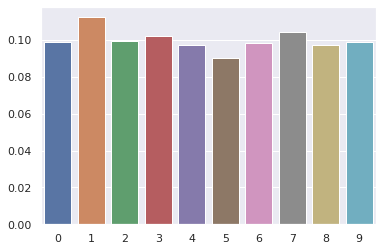

In [8]:
series = pd.Series(dataset1.train_labels).value_counts(normalize=True)
sns.barplot(x=series.index, y=[i for i in series])

/home/johnny/.conda/envs/al_datasets/lib/python3.8/site-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/johnny/.conda/envs/al_datasets/lib/python3.8/site-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


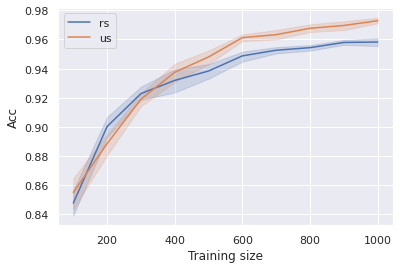

In [17]:
for samp, trials in [('rs', trials_rs), ('us', trials_us)]:
    x, y = [], []
    for rounds in trials:
        for round in rounds:
            train_idx = np.array(round['train_idx'])
            train_labels = dataset1.train_labels[train_idx]
            x.append(len(train_idx))
            y.append(round['test_acc'])

        #plt.figure()
    df = pd.DataFrame({'Training size' : x, 'Acc' : y})
    sns.lineplot(data=df, x='Training size', y='Acc', label=samp)

### Label entropy

/home/johnny/.conda/envs/al_datasets/lib/python3.8/site-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/johnny/.conda/envs/al_datasets/lib/python3.8/site-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


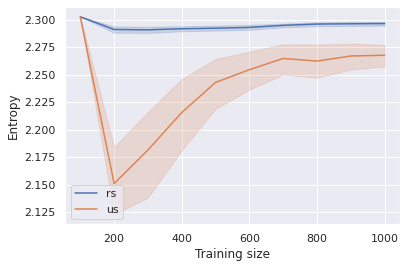

In [9]:
for samp, trials in [('rs', trials_rs), ('us', trials_us)]:
    x, y = [], []
    for rounds in trials:
        for round in rounds:
            train_idx = np.array(round['train_idx'])
            train_labels = dataset1.train_labels[train_idx]
            x.append(len(train_idx))

            counts = pd.Series(train_labels).value_counts()
            H = entropy(counts)
            y.append(H)

        #plt.figure()
    df = pd.DataFrame({'Training size' : x, 'Entropy' : y})
    sns.lineplot(data=df, x='Training size', y='Entropy', label=samp)

/home/johnny/.conda/envs/al_datasets/lib/python3.8/site-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/johnny/.conda/envs/al_datasets/lib/python3.8/site-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


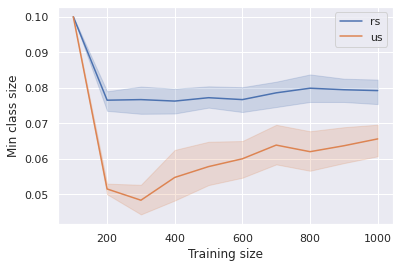

In [10]:
for samp, trials in [('rs', trials_rs), ('us', trials_us)]:
    x, y = [], []
    for rounds in trials:
        for round in rounds:
            train_idx = np.array(round['train_idx'])
            train_labels = dataset1.train_labels[train_idx]
            x.append(len(train_idx))

            counts = pd.Series(train_labels).value_counts()
            # minority classes
            y.append(counts.min() / counts.sum())

        #plt.figure()
    df = pd.DataFrame({'Training size' : x, 'Min class size' : y})
    sns.lineplot(data=df, x='Training size', y='Min class size', label=samp)

# Smallest group accuracy

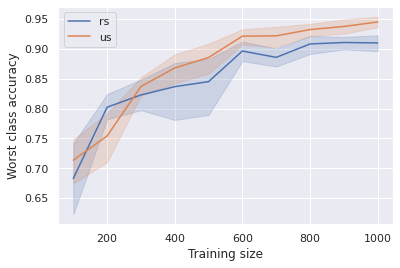

In [18]:
for samp, trials in [('rs', trials_rs), ('us', trials_us)]:
    x, y = [], []
    for rounds in trials:
        for round in rounds:
            train_idx = np.array(round['train_idx'])
            preds = round['test_predictions']
            df = pd.DataFrame({'labels' : dataset2.targets, 'predictions' : preds})
            df['correct'] = df['labels'] == df['predictions']

            x.append(len(train_idx))

            df_label = df.groupby('labels')
            y.append(df_label.correct.mean().min())

    df = pd.DataFrame({'Training size' : x, 'Worst class accuracy' : y})
    sns.lineplot(data=df, x='Training size', y='Worst class accuracy', label=samp)

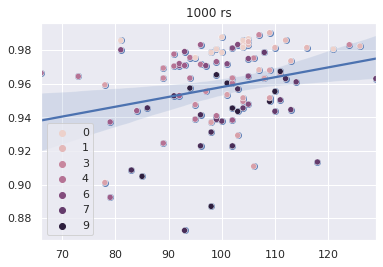

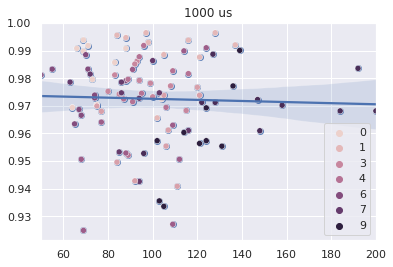

In [59]:
for samp, trials in [('rs', trials_rs), ('us', trials_us)]:
    x, y, z = [], [], []
    plt.figure()
    for rounds in trials:
        round = rounds[-1]
        train_idx = np.array(round['train_idx'])
        preds = round['test_predictions']
        df = pd.DataFrame({'labels' : dataset2.targets, 'predictions' : preds})
        df['correct'] = df['labels'] == df['predictions']

        df_label = df.groupby('labels')
        label_accs = df_label.correct.mean()
        
        train_labels = dataset1.targets[train_idx].numpy()
        label_counts = [ np.sum(train_labels == i) for i in range(0, 10) ]
        
        for c, a, t in zip(label_counts, label_accs, range(0,10)):
            x.append(c)
            y.append(a)
            z.append(t)
            
    plt.title('%d %s' % (len(train_idx), samp))
    sns.regplot(x=x, y=y)
    sns.scatterplot(x=x, y=y, hue=z)